In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declaring some global constants

G = 1.0
M_e = 1.0
M_s = 100.0
G_constant = G * M_e * M_s
dt = 0.05 # time-step

# Method to compute gravitational force from Newton's Law of Gravitation
def compute_force(position):
    r = position # Sun is kept fixed at (0,0) so r_vector = r_vector_earth - 0_vector_sun = r(x_earth, y_earth) 
    r_cubed = np.sum(r**2)**1.5
    f = -G_constant * r / r_cubed
    
    return f

Text(0, 0.5, 'Total Energy')

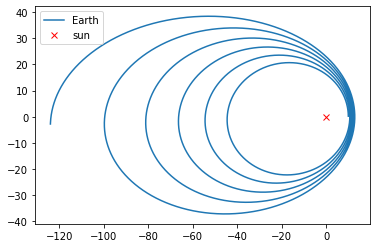

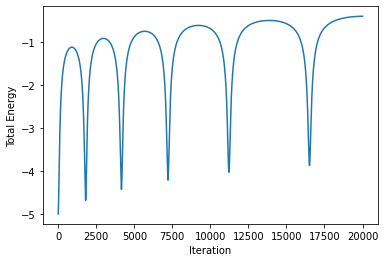

In [3]:
# EXPLICIT EULER METHOD

# Initial Conditions
pos_e = np.array([10.0, 0.0]) # position vector of earth
vel_e = np.array([0.0, 4]) # velocity vector of earth

position_e_x_explicit_euler = [] # vector to store x-coordinate of earth
position_e_y_explicit_euler = [] # vector to store y-coordinate of earth
energy_explicit_euler = [] # vector to store the total energy of earth
t = 0 # initial time instance

while t < 1000:
    #force computation
    f = compute_force(pos_e)
    
    # calculating velocities and positions at the end of the time-step 
    accl_e = f / M_e
    vel_e_new = vel_e + accl_e * dt 
    pos_e_new = pos_e + vel_e * dt
    
    # Updating velocities and positions
    pos_e = pos_e_new
    vel_e = vel_e_new
    
    # Calculating total energy to check stabiity of the method
    # Shortened energy calculation formula taken from https://deutsch.physics.ucsc.edu/6A/book/gravity/node15.html
    total_energy = -G_constant / (2 * (np.sum(pos_e**2)**0.5))
    
    # Appending the new positions to a list so that they can be plotted later    
    position_e_x_explicit_euler.append(pos_e[0])
    position_e_y_explicit_euler.append(pos_e[1])
    energy_explicit_euler.append(total_energy)
    
    # increment time    
    t = t + dt
    
plt.plot(position_e_x_explicit_euler, position_e_y_explicit_euler, label='Earth')
plt.plot(0.0, 0.0, 'rx', label='sun') # Sun is kept constant at (0,0)
plt.legend()
plt.figure()
plt.plot(energy_explicit_euler)
plt.xlabel('Iteration')
plt.ylabel('Total Energy')

Text(0, 0.5, 'Total Energy')

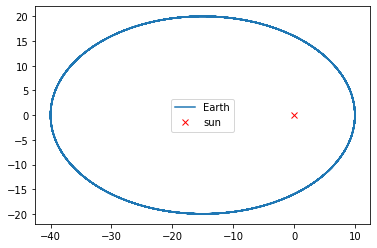

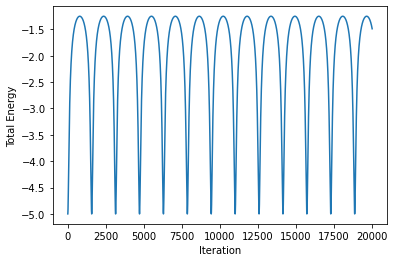

In [4]:
# VELOCITY-VERLET METHOD
# Reference : https://en.wikipedia.org/wiki/Verlet_integration#Velocity_Verlet

# Initial Conditions
pos_e = np.array([10.0, 0.0]) # position vector of earth
vel_e = np.array([0.0, 4]) # velocity vector of earth

position_e_x_verlet = [] # vector to store x-coordinate of earth
position_e_y_verlet = [] # vector to store y-coordinate of earth
energy_verlet = [] # vector to store the total energy of earth
t = 0 # initial time instance

while t < 1000:
    # force computation
    f = compute_force(pos_e)
    
    # calculating velocities and positions at the end of the half time-step and full time-step
    accl_e = f / M_e # acceleration at the beginning of the step
    
    pos_e_new = pos_e + vel_e * dt + accl_e * (dt * dt * 0.5) # position at the end of full step    
    f_new = compute_force(pos_e_new) # force at the end of full step using updated position
    accl_e_new = f_new / M_e
    vel_e_new = vel_e + (accl_e + accl_e_new) * 0.5 * dt # velocity at the end of full step using acceleration
                                                         # from the beginning and end of time-step
    
    # Updating velocities and positions at the end of full step
    pos_e = pos_e_new
    vel_e = vel_e_new           
    
    # Calculating total energy to check stabiity of the method
    # Shortened energy calculation formula taken from https://deutsch.physics.ucsc.edu/6A/book/gravity/node15.html
    total_energy = -G_constant / (2 * (np.sum(pos_e**2)**0.5))   
    
    # Appending the new positions to a list so that they can be plotted later
    position_e_x_verlet.append(pos_e[0])
    position_e_y_verlet.append(pos_e[1])
    energy_verlet.append(total_energy)
    
    # increment time    
    t = t + dt
    
plt.plot(position_e_x_verlet, position_e_y_verlet, label='Earth')
plt.plot(0, 0, 'rx', label='sun') # Sun is kept constant at (0,0)
plt.legend()
plt.figure()
plt.plot(energy_verlet)
plt.xlabel('Iteration')
plt.ylabel('Total Energy')